In [1]:
import random
from collections import Counter

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D

from src.preprocess.make_dataset import get_window_dataset
from src.preprocess.feature import normalize_windows
from src.preprocess.augmentation import augment_data
from src.utils.plot import plot_training


# Set seeds for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
WINDOW_SIZE = 15

In [3]:
df = pd.read_csv('data/data.csv', parse_dates=['Date'])
windows, labels = get_window_dataset(df, WINDOW_SIZE)
windows

[array([[139.5],
        [138. ],
        [135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5]]),
 array([[138. ],
        [135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5]]),
 array([[135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5],
        [137.5]]),
 array([[133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5],
        

In [4]:
windows, labels = augment_data(windows, labels)

windows

[array([[139.5],
        [138. ],
        [135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5]]),
 array([[138. ],
        [135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5]]),
 array([[135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5],
        [137.5]]),
 array([[133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5],
        

In [5]:
Counter(labels)

Counter({'UP': 3362, 'DOWN': 3362, 'MIXED': 2000})

In [6]:
X = np.array(windows)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y, num_classes=3)

X.shape, y.shape

((8724, 15, 1), (8724, 3))

In [7]:
X = normalize_windows(X)
X

array([[[1.        ],
        [0.8125    ],
        [0.5       ],
        ...,
        [0.375     ],
        [0.4375    ],
        [0.875     ]],

       [[0.8125    ],
        [0.5       ],
        [0.1875    ],
        ...,
        [0.4375    ],
        [0.875     ],
        [1.        ]],

       [[0.5       ],
        [0.1875    ],
        [0.3125    ],
        ...,
        [0.875     ],
        [1.        ],
        [0.75      ]],

       ...,

       [[0.        ],
        [0.09090909],
        [0.09090909],
        ...,
        [0.81818182],
        [0.45454545],
        [0.27272727]],

       [[0.        ],
        [0.        ],
        [0.09090909],
        ...,
        [0.54545455],
        [0.81818182],
        [0.45454545]],

       [[0.27272727],
        [0.        ],
        [0.        ],
        ...,
        [0.45454545],
        [0.54545455],
        [0.81818182]]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify keeps class balance
)

In [9]:
model = Sequential([
    Conv1D(256, kernel_size=3, activation='relu', input_shape=(WINDOW_SIZE, 1)),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv1D(256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv1D(128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    GlobalAveragePooling1D(),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 11, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 9, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 9, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 7, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 6, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │             

 Total params: 391,747 (1.49 MB)

 Trainable params: 389,795 (1.49 MB)

 Non-trainable params: 1,952 (7.62 KB)

In [10]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=256,
)

Epoch 1/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4216 - loss: 1.4731 - val_accuracy: 0.4854 - val_loss: 1.0663
Epoch 2/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5132 - loss: 1.1802 - val_accuracy: 0.6160 - val_loss: 1.0116
Epoch 3/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5344 - loss: 1.0704 - val_accuracy: 0.6034 - val_loss: 0.9672
Epoch 4/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5486 - loss: 1.0145 - val_accuracy: 0.5272 - val_loss: 0.9792
Epoch 5/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5743 - loss: 0.9446 - val_accuracy: 0.6006 - val_loss: 0.9188
Epoch 6/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5751 - loss: 0.9380 - val_accuracy: 0.6189 - val_loss: 0.8832
Epoch 7/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5821 - loss: 0.9023 - val_accuracy: 0.5444 - val_loss: 1.0195
Epoch 8/300
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5966 - loss: 0.8991 - val_accuracy: 0.

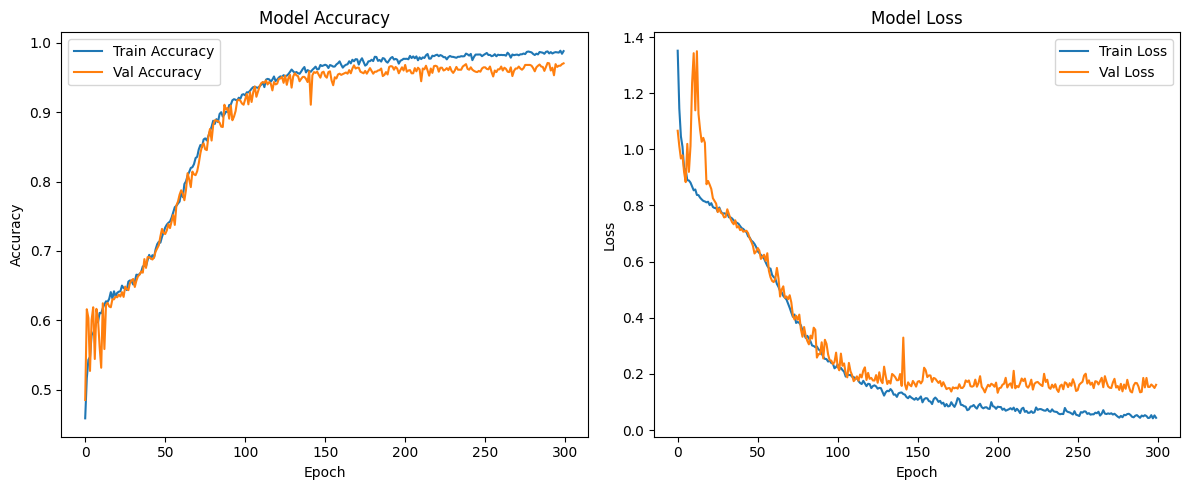

In [11]:
plot_training(history)

In [12]:
y_pred_probs = model.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

original_class_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
print(classification_report(y_true, y_pred, target_names=original_class_names))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

        DOWN       0.98      0.98      0.98       672
       MIXED       0.96      0.94      0.95       400
          UP       0.96      0.98      0.97       673

    accuracy                           0.97      1745
   macro avg       0.97      0.97      0.97      1745
weighted avg       0.97      0.97      0.97      1745



In [ ]:
model.save('models/cnn_1d_huge.keras')